PHYS 381: Computational Physics I

Jared Crebo 30085839

Final Take-Home Exam

Kernel: Python 3.10.11 | IDE: Visual Studio Code

5 Space invaders game

You entered as seed for the random number generator: 90

The initial velocity of the cannonball is: 63 m/s

The velocity of the space invader is: 15 m/s

No collision detected


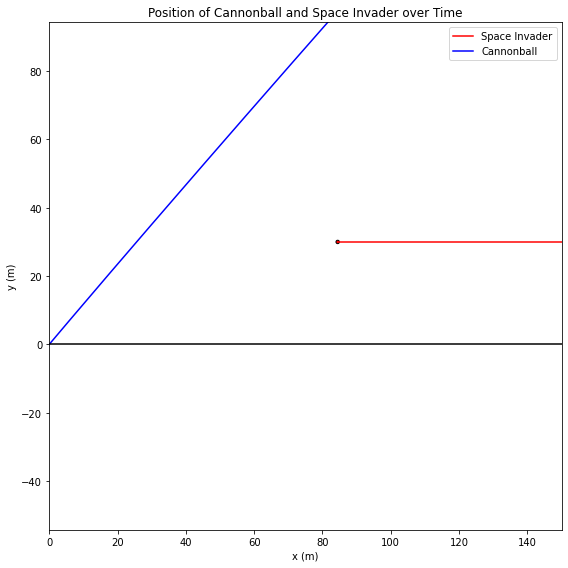

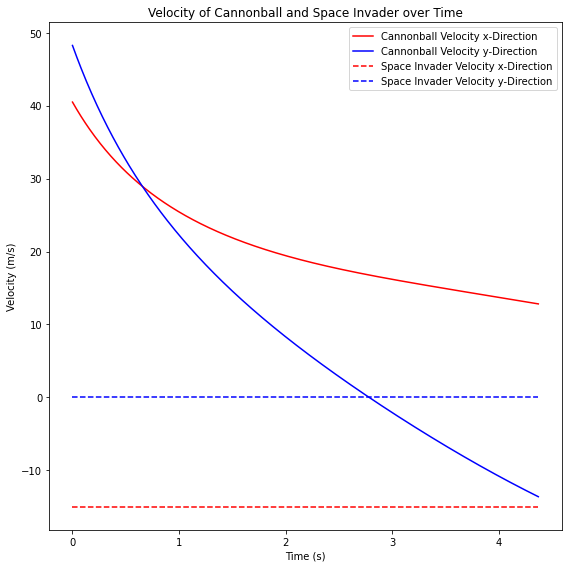

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

h = 30 # height of space invader in meters
L = 150 # horizontal distance in meters
m = 46 * 10**-3 # mass in kg
Do = 43 * 10**-3 # cannonball diameter in meters
Ds = 1 # space invader diameter in meters
theta = 50 # cannon angle in degrees
Vo = 63 # initial velocity of cannonball in m/s (random generation)
Vs = 15 # initial velocity of space invader in m/s (random generation)
C = 0.25 # constant in Ns^2/m

def position_air_resistance_quad(mass, C, D, x1, y1, vx1, vy1):
    '''
    Input Parameters
    mass - mass of object (kg)
    C - quadratic air resistance coefficient (Ns^2/m^4)
    D - diameter of object (m)
    x1 - initial x coordinate
    y1 - initial y coordinate
    vx1 - initial x velocity
    vy1 - initial y velocity

    Function uses Explicit Euler method to calculate the change in (x,y) position wrt time
    Function assumes quadratic air resistance
    Function returns three Python lists of time and x,y positions
    '''

    # Initialize time, position, and velocity variables
    # Implement initial conditions into first entry in list
    y = [y1]
    x = [x1]
    t = [0]
    vy = [vy1]
    vx = [vx1]

    # Calculate drag coefficient
    c = C*D**2
    
    i = 0
    while y[i] >= 0: # Iterate until object hits the ground (y = 0)
        i += 1
        dvy = - g*dt - c/mass * np.sqrt(vx[i-1]**2 + vy[i-1]**2) * vy[i-1] * dt # Calculate change in vertical velocity using Explicit Euler method on quadratic air resistance equation
        vy.append(vy[i-1] + dvy) # Add change in vertical velocity to the vertical velocity list
        dvx = -c/mass * np.sqrt(vx[i-1]**2 + vy[i-1]**2) * vx[i-1] * dt # Calculate change in horizontal velocity using Explicit Euler method on quadratic air resistance equation
        vx.append(vx[i-1] + dvx) # Add change in horizontal velocity to the horizontal velocity list

        y.append(y[i-1] + vy[i-1] * t[i-1]) # Update new y position based on new velocity
        x.append(x[i-1] + vx[i-1] * t[i-1]) # Update new x position based on new velocity
        t.append(t[i-1] + dt) # Update t + dt
    return t, x, y, vx, vy

def collision_detection(t, xo, yo, xs, ys):
    '''
    Input Parameters
    t - time array
    xo - x position array of cannonball
    yo - y position array of cannonball
    xs - x position array of space invader
    ys - y position array of space invader

    Function assumes all arrays are equal length and checks each location at the same timestep for a collision
    Return timestep of collision, else return None
    '''

    for i in range(len(t)): # for each timestep
        # Calculate the distance between the space invader and cannonball
        distance = np.sqrt((ys[i]-yo[i])**2 + (xs[i]-xo[i])**2)
        # If the distance is less than the sum of both object's radii, a collision has occurred
        if distance < (Do + Ds)/2:
            return i
    return -1

# Calculate position of cannonball through time, including air resistance
t, x_cannon, y_cannon, vx_cannon, vy_cannon = position_air_resistance_quad(m, C, Do, 0, 0, Vo*np.cos(np.deg2rad(theta)), Vo*np.sin(np.deg2rad(theta)))
t, x_cannon, y_cannon, vx_cannon, vy_cannon = np.array(t), np.array(x_cannon), np.array(y_cannon), np.array(vx_cannon), np.array(vy_cannon) # Convert Python lists to NumPy arrays
# Calculate position of space invader through time, with constant velocity, using kinematic equations
x_space = L - Vs*t # Calculate x position using kinematic equation
y_space = h * np.ones(len(t)) # Hold y position constant

# Check for collision detection
index = collision_detection(t, x_cannon, y_cannon, x_space, y_space)
if index > -1:
    print(f"Collision occurs at {t[index]:.2f}s")
else:
    print("No collision detected")

# Plot trajectories over time
fig, ax = plt.subplots(figsize=[8,8])
ax.plot(x_space, y_space, color = 'red', label = 'Space Invader')
ax.plot(x_cannon, y_cannon, color = 'blue', label = 'Cannonball')
space_invader = patches.Circle((x_space[-1],y_space[-1]), Ds/2, edgecolor = 'black', facecolor = 'red')
cannonball = patches.Circle((x_cannon[-1], y_cannon[-1]), Do/2, edgecolor = 'black', facecolor = 'blue')
ax.add_patch(space_invader)
ax.add_patch(cannonball)
ax.hlines(0, 0, L, color = 'black')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.axis('equal')
ax.set_xlim([0, L])
ax.set_ylim([0, h+10])
ax.legend()
ax.set_title('Position of Cannonball and Space Invader over Time')
fig.tight_layout()

# Plots of velocity over time
fig, ax = plt.subplots(figsize=[8,8])
ax.plot(t, vx_cannon, color = 'red', label = 'Cannonball Velocity x-Direction')
ax.plot(t, vy_cannon, color = 'blue', label = 'Cannonball Velocity y-Direction')
ax.plot(t, -Vs*np.ones(len(t)), 'r--', label = 'Space Invader Velocity x-Direction')
ax.plot(t, np.zeros(len(t)), 'b--', label = 'Space Invader Velocity y-Direction')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Velocity (m/s)')
ax.legend()
ax.set_title('Velocity of Cannonball and Space Invader over Time')
fig.tight_layout()

For the initial conditions randomly generated for the cannonball and space invader, there is no collision detected. The trajectory of the space invader is calculated using kinematic equations with a constant 15m/s velocity in the -x direction. The trajectory of the cannonball is calculated using the explicit Euler method to iterate its position using the following equations:

$\frac{dv_{x}}{dt} = -\frac{c}{m}\sqrt{(v_{x}^{2}+v_{y}^{2})}v_{x}$

$\frac{dv_{y}}{dt} = -g - \frac{c}{m}\sqrt{(v_{x}^{2}+v_{y}^{2})}v_{y}$ where c denotes the drag coefficient

The changes in velocity $dv_{x}$ and $dv_{y}$ are solved for at each timestep and used to update the position of the cannonball. A function is created to determine whether a collision occurs based on the distance between the space invader and cannonball, and their respective diameters. This method detects no collision. 

The trajectories of both objects are plotted in the first figure above, and show that the cannonball is fired at such a high velocity (63m/s) that it passes the space invader long before the space invader enters its projectile path. The component velocities of each object are plotted on the second figure, showing how the space invader moves at a constant horizontal velocity and the cannonball experiences nonlinear velocity and acceleration over time. 